<a href="https://colab.research.google.com/github/0Rumi1/gc/blob/main/real_grabage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as td
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pylab as plt

In [ ]:
drive_path = '/content/drive/MyDrive/Colab Notebooks/project/'
source_filename = drive_path + 'dataset/archive (5).zip'

extract_folder = '/content/drive/MyDrive/Colab Notebooks/project/dataset/'

In [ ]:
# import shutil

In [ ]:
# shutil.unpack_archive(source_filename, extract_folder)

In [ ]:
import os
import matplotlib.pyplot as plt


def plot_imags(item_dir, top = 10):
  all_trash_dirs = os.listdir(item_dir)
  item_files = [os.path.join(item_dir, file) for file in all_trash_dirs][:5]

  plt.figure(figsize = (10,10))

  for idx, image_path in enumerate(item_files):
    sp = plt.subplot(5,5, idx+1)

    img = plt.imread(image_path)
    plt.tight_layout()
    sp.axis('Off')
    plt.imshow(img, cmap = 'gray')

In [ ]:
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/project/dataset/garbage_classification'))

# 압축을 푼 폴더의 이름을 나열

['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']


In [ ]:
# 각 폴더의 이미지 데이터 경로

data_path = '/content/drive/MyDrive/Colab Notebooks/project/dataset/garbage_classification'

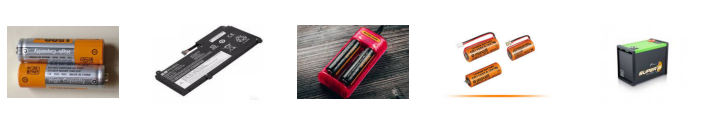

In [ ]:
plot_imags(data_path + '/battery')

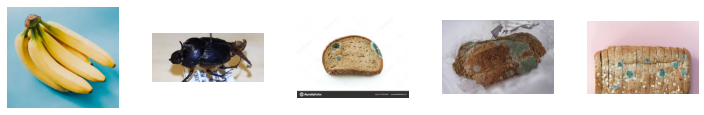

In [ ]:
plot_imags(data_path + '/biological')

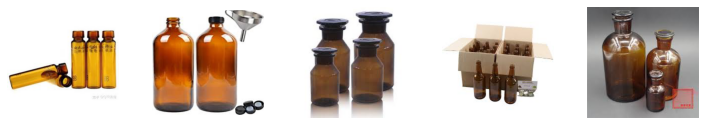

In [ ]:
plot_imags(data_path + '/brown-glass')

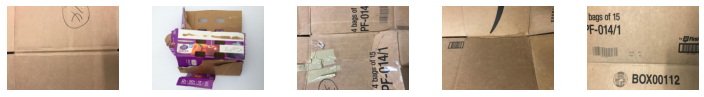

In [ ]:
plot_imags(data_path + '/cardboard')

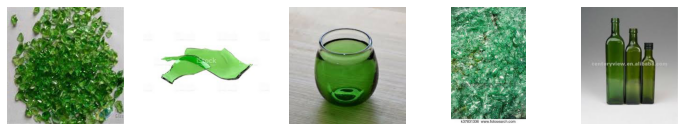

In [ ]:
plot_imags(data_path + '/green-glass')

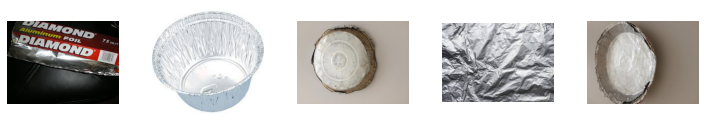

In [ ]:
plot_imags(data_path + '/metal')

In [ ]:
# plot_imags(data_path + '/paper')

In [ ]:
# plot_imags(data_path + '/trash')

In [ ]:
# plot_imags(data_path + '/white-glass')

In [ ]:
# plot_imags(data_path + '/shoes')

In [ ]:
# plot_imags(data_path + '/clothes')

Data Generator 를 통한 학습 및 테스트 데이터 만들기

In [ ]:
# 이미지 수: 총 1만 5천장
batch_size = 128

In [ ]:
#Data Generator
# 이미지 증강
train =ImageDataGenerator(horizontal_flip=True, vertical_flip=True,
                          validation_split=0.1,  # 훈련 데이터와 검증 데이터를 90:10 로 나눔
                          rescale=1./255,        # 정규화
                          rotation_range= 30,    # 이미지 30도 회전
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

test=ImageDataGenerator(rescale=1./255,validation_split=0.1)



In [ ]:
# target_size = 224,224 로 설정

train_gen=train.flow_from_directory(data_path,target_size=(224,224),batch_size=batch_size,class_mode='categorical',subset='training')

test_gen=test.flow_from_directory(data_path,target_size=(224,224),batch_size=batch_size,class_mode='categorical',subset='validation')

Found 13182 images belonging to 11 classes.
Found 1458 images belonging to 11 classes.


In [ ]:
# 라벨 설정 

labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'battery', 1: 'biological', 2: 'brown-glass', 3: 'cardboard', 4: 'clothes', 5: 'green-glass', 6: 'metal', 7: 'paper', 8: 'shoes', 9: 'trash', 10: 'white-glass'}


In [ ]:
# 11개의 클래스

num_classes = 11

Functional API 모델 생성

In [ ]:
from keras.engine import input_layer
# Build Model - functional_api

input_layer = tf.keras.Input(shape=(224,224, 3), name = 'InputLayer') # 입력 레이어

x1 = tf.keras.layers.Conv2D(32,(3,3), padding='same',activation='relu')(input_layer) # relu 활성화 함수 
x2 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(x1) # maxpooling2D : input 차원을 줄임
x3 = tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu')(x2)
x4 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(x3)
x5 = tf.keras.layers.Conv2D(32,(3,3), padding='same', activation='relu')(x4)
x6 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x5)
x7 = tf.keras.layers.Flatten(name = 'Flatten')(x6)
x8 = tf.keras.layers.Dense(64,activation='relu', name = 'Dense1')(x7)
x9 = tf.keras.layers.Dropout(0.4, name = 'Dropout')(x8)
x10 = tf.keras.layers.Dense(num_classes,activation='softmax', name = 'OutputLayer')(x9)


# Create Model
fun_model = tf.keras.Model(inputs=input_layer, outputs=x10, name='FunctionalModel')

In [ ]:
fun_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 32)    

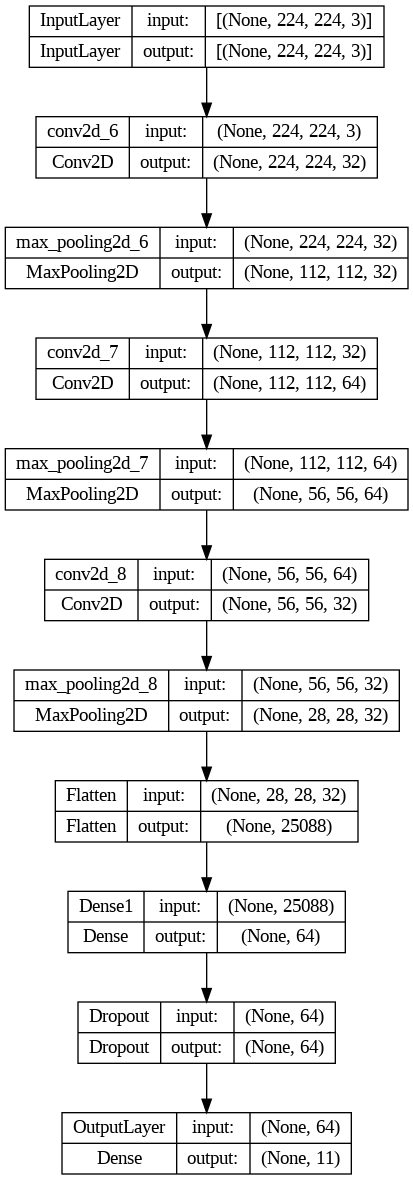

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(fun_model, show_shapes=True, show_layer_names=True, to_file = 'model.png')

모델 컴파일

In [ ]:
fun_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

모델 훈련

In [ ]:
# 조기 종료
earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

In [ ]:
num_epochs = 30

# 총 샘플 수를 학습 및 테스트 중에 사용된 배치 크기로 나누어야 합니다.
step_size_train=train_gen.n//train_gen.batch_size
step_size_test =test_gen.n//test_gen.batch_size

In [ ]:
# 사용 가능한 RAM을 모두 사용한 후 세션이 다운되었습니다. batch_size = 128로 설정 시 오류 발생
# Google Colaboratory사용시 발생하는 문제로, Conv2D 혹은 Weighting, bias를 너무 많이 사용하는 모델을 사용시 발생하는 문제였습니다.
# Conv2D를 Filter Size를 32개씩 3개 Layer정도로 구성했고, 100X100X3 이미지를 학습하고자했는데요
# 이미지도 몇장 안됬는데 왜 RAM 최대치 초과가 뜰까.. 고민하다보니
# MNIST데이터는 6만장임에도 이런문제가 발생하지 않는것을보고, 혹시 이미지 사이즈에 의해 램을 너무 많이잡아먹는건가?? 싶어서 128x128X3으로 줄이니 바로 문제가 해결됨
# Train Model
history = fun_model.fit(train_gen, epochs=num_epochs, steps_per_epoch=step_size_train,validation_data=test_gen,
                    validation_steps=step_size_test,callbacks=earlystopping)

Epoch 1/30
102/102 [==============================] - 215s 2s/step - loss: 1.7888 - accuracy: 0.4073 - val_loss: 1.4787 - val_accuracy: 0.4950
Epoch 2/30
102/102 [==============================] - 208s 2s/step - loss: 1.4074 - accuracy: 0.5138 - val_loss: 1.2547 - val_accuracy: 0.5710
Epoch 3/30
102/102 [==============================] - 205s 2s/step - loss: 1.2678 - accuracy: 0.5741 - val_loss: 1.2081 - val_accuracy: 0.5689
Epoch 4/30
102/102 [==============================] - 204s 2s/step - loss: 1.2057 - accuracy: 0.5897 - val_loss: 1.1162 - val_accuracy: 0.6072
Epoch 5/30
102/102 [==============================] - 206s 2s/step - loss: 1.1601 - accuracy: 0.6094 - val_loss: 1.0756 - val_accuracy: 0.6293
Epoch 6/30
102/102 [==============================] - 204s 2s/step - loss: 1.1249 - accuracy: 0.6178 - val_loss: 1.0269 - val_accuracy: 0.6392
Epoch 7/30
102/102 [==============================] - 206s 2s/step - loss: 1.1056 - accuracy: 0.6261 - val_loss: 1.0653 - val_accuracy: 0.6413

In [ ]:
# 손실함수, 정확도 그래프 그리기

import matplotlib.pyplot as plt

def plot_loss(history, epoch):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

def plot_accuracy(history, epoch):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

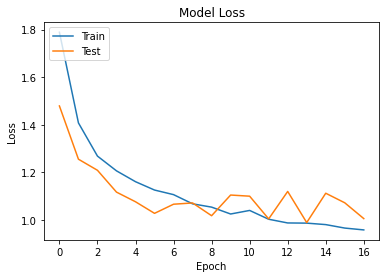

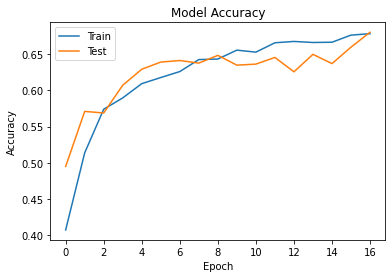

In [ ]:
plot_loss(history, 30)
plot_accuracy(history, 30)

모델 예측

In [ ]:
filenames = test_gen.filenames
nb_samples = len(filenames)

_, accuracy = fun_model.evaluate_generator(test_gen, nb_samples)

print('Accuracy on test set = ',  round((accuracy * 100),2 ), '% ') 

<ipython-input-71-77108f2f4530>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, accuracy = fun_model.evaluate_generator(test_gen, nb_samples)


Accuracy on test set =  67.9 % 


In [ ]:
# get the model's predictions for the test set
preds = fun_model.predict_generator(test_gen, nb_samples)

# Get the category with the highest predicted probability, the prediction is only the category's number and not name
preds = preds.argmax(1)

# Convert the predicted category's number to name 
preds = [labels[item] for item in preds]



<ipython-input-72-3cfdfcf1a68f>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = fun_model.predict_generator(test_gen, nb_samples)


In [ ]:
values = np.array(list(labels.values()))
print(values)

['battery' 'biological' 'brown-glass' 'cardboard' 'clothes' 'green-glass'
 'metal' 'paper' 'shoes' 'trash' 'white-glass']
